# **Proyek Pertama : Predictive Analytics**

**Nama : Iqbal Tio Ardiansyah**

**Group : M06**

**Mengimport library yang dibutuhkan**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

**Mengambil data Crude Oil pada yahoo finance**

In [2]:
cl = yf.Ticker("CL")
cl = cl.history(period="max")

In [3]:
cl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-05-02,0.000000,0.470298,0.462337,0.470298,672000,0.0,0.0
1973-05-03,0.000000,0.473360,0.459275,0.471523,739200,0.0,0.0
1973-05-04,0.000000,0.477034,0.467849,0.470298,1339200,0.0,0.0
1973-05-07,0.000000,0.473972,0.466624,0.467849,316800,0.0,0.0
1973-05-08,0.000000,0.467848,0.458051,0.467236,619200,0.0,0.0
...,...,...,...,...,...,...,...
2022-09-26,75.529999,75.779999,74.779999,75.000000,3797200,0.0,0.0
2022-09-27,75.360001,75.639999,72.529999,72.580002,5260600,0.0,0.0
2022-09-28,73.150002,73.410004,72.199997,72.910004,6450900,0.0,0.0


**Menghapus kolom yang tak digunakan**

In [4]:
cl = cl.drop(['Dividends', 'Stock Splits'], axis=1)

In [5]:
cl

,Open,High,Low,Close,Volume
Date,,,,,
1973-05-02,0.000000,0.470298,0.462337,0.470298,672000
1973-05-03,0.000000,0.473360,0.459275,0.471523,739200
1973-05-04,0.000000,0.477034,0.467849,0.470298,1339200
1973-05-07,0.000000,0.473972,0.466624,0.467849,316800
1973-05-08,0.000000,0.467848,0.458051,0.467236,619200
...,...,...,...,...,...
2022-09-26,75.529999,75.779999,74.779999,75.000000,3797200
2022-09-27,75.360001,75.639999,72.529999,72.580002,5260600
2022-09-28,73.150002,73.410004,72.199997,72.910004,6450900


**Menampilkan jumlah banyak data dan kolom pada dataset kita**

In [6]:
print(f'The data has {cl.shape[0]} records and {cl.shape[1]} columns.')

The data has 12465 records and 5 columns.


In [7]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12465 entries, 1973-05-02 to 2022-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12465 non-null  float64
 1   High    12465 non-null  float64
 2   Low     12465 non-null  float64
 3   Close   12465 non-null  float64
 4   Volume  12465 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 584.3 KB


In [8]:
cl.describe()

,Open,High,Low,Close,Volume
count,12465.000000,12465.000000,12465.000000,12465.000000,1.246500e+04
mean,20.072468,20.266769,19.942843,20.111158,3.547007e+06
std,23.911705,24.059915,23.716813,23.890120,2.605263e+06
min,0.000000,0.221097,0.209210,0.213965,9.440000e+04
25%,0.716054,0.720911,0.709362,0.716054,2.014000e+06
50%,10.780032,10.965026,10.582493,10.780028,3.076400e+06
75%,29.702963,29.920181,29.507595,29.724218,4.442400e+06
max,83.636616,84.137848,83.253323,83.872490,4.701360e+07


**Melihat data null pada dataset**

In [9]:
cl.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
high = (cl.High == 0).sum()
low = (cl.Low == 0).sum()
open = (cl.Open == 0).sum()
close = (cl.Close == 0).sum()
vol = (cl.Volume == 0).sum()


print(high,low,open,close,vol)

0 0 928 0 0


**Visualisasi data**

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


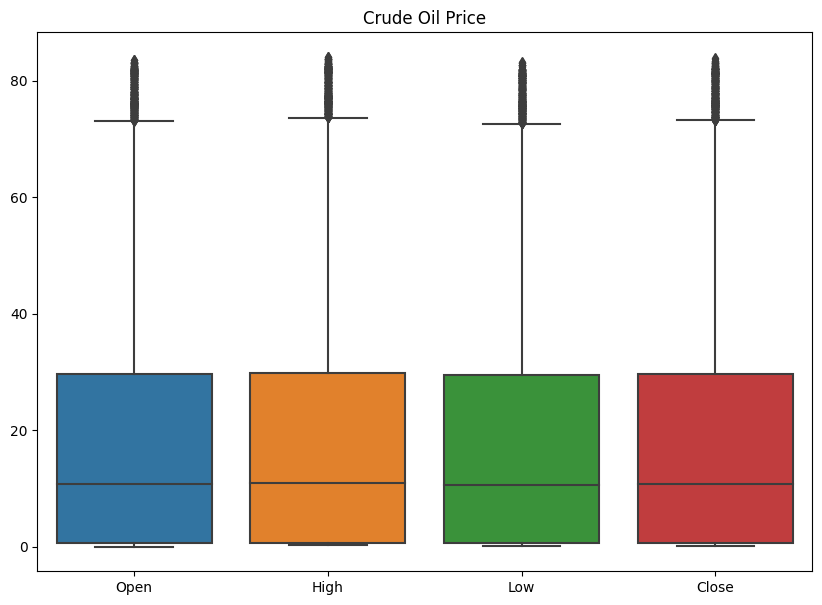

In [11]:
numerical_col = [col for col in cl.columns if cl[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=cl[numerical_col]).set_title("Crude Oil Price")
plt.show()

**Menangani outliers pada data**

In [12]:
Q1 = cl.quantile(0.25)
Q3 = cl.quantile(0.75)
IQR = Q3-Q1
cl=cl[~((cl<(Q1-1.5*IQR))|(cl>(Q3+1.5*IQR))).any(axis=1)]

cl.shape

(11386, 5)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


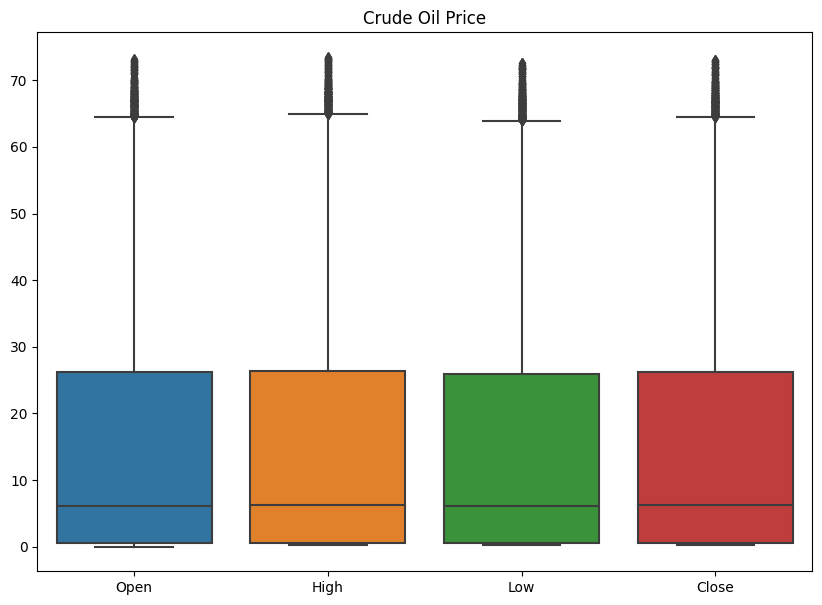

In [13]:
numerical_col = [col for col in cl.columns if cl[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=cl[numerical_col]).set_title("Crude Oil Price")
plt.show()

**Univariate Analytics**

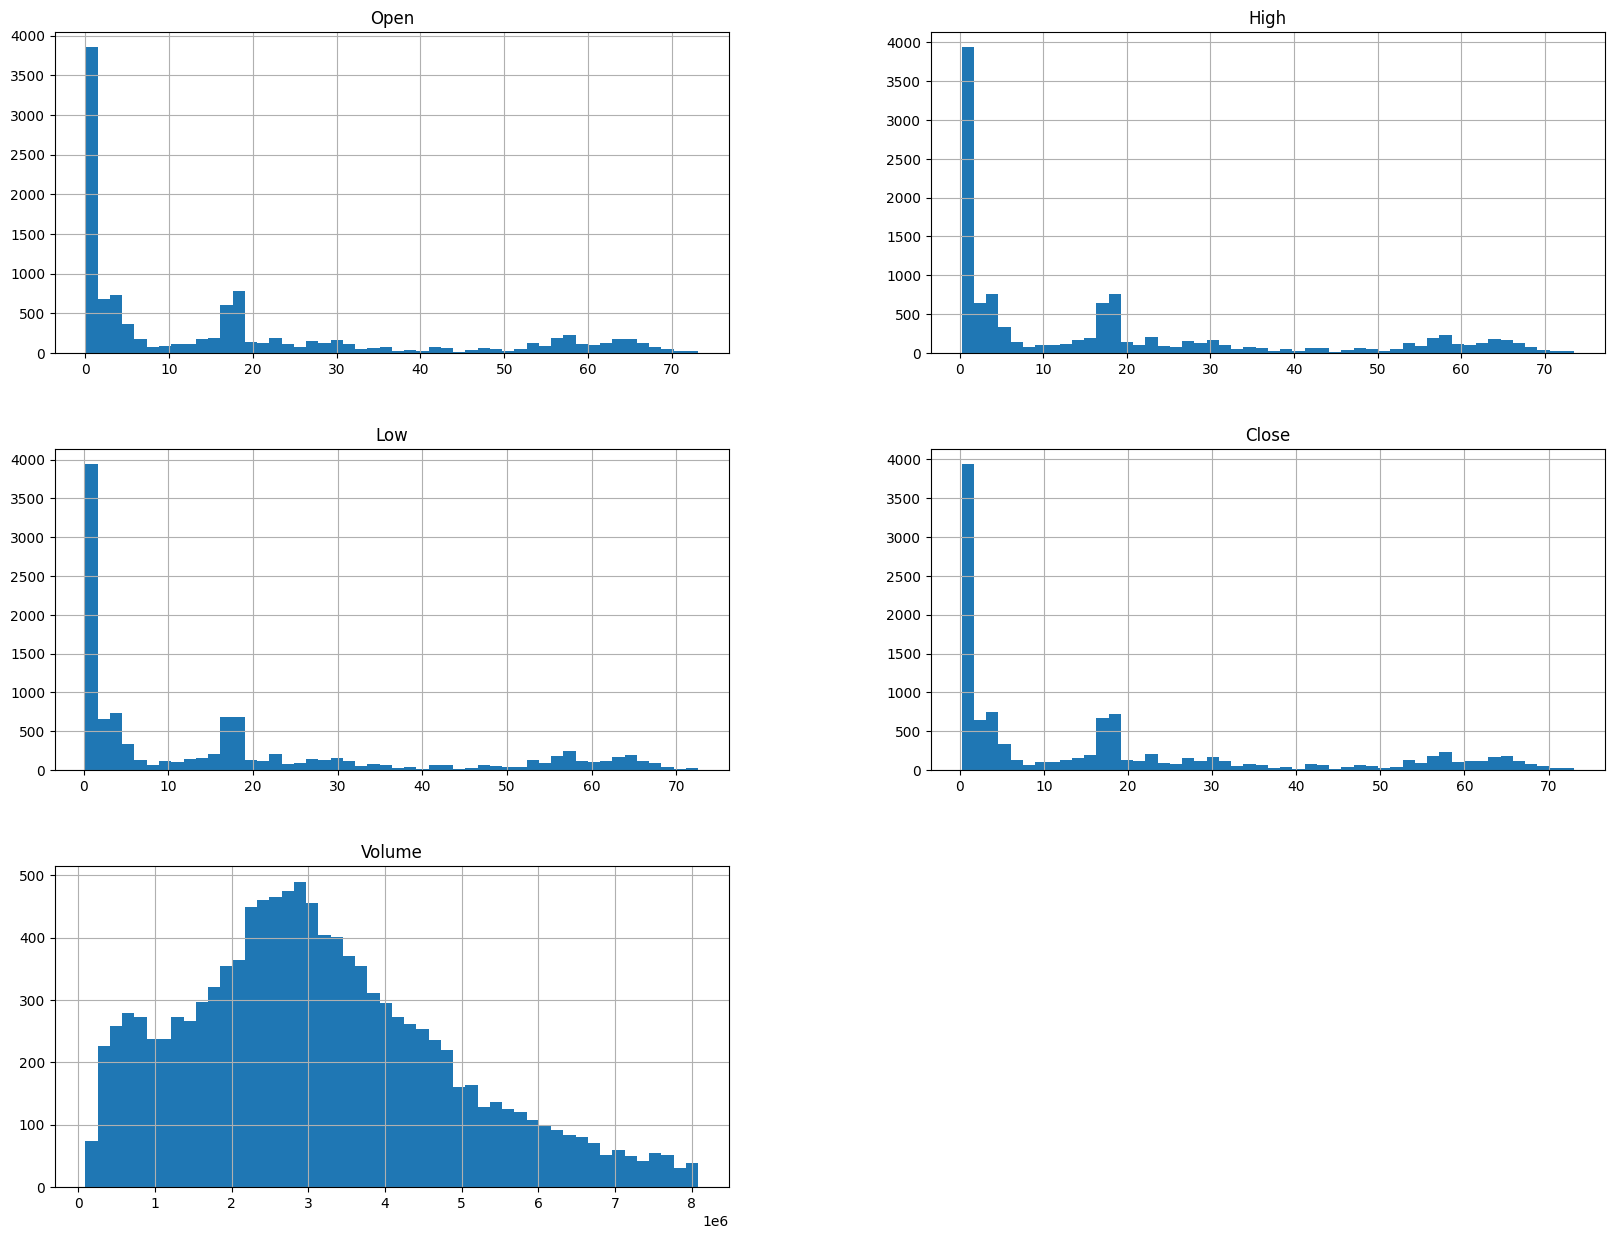

In [14]:
cl.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analytics**

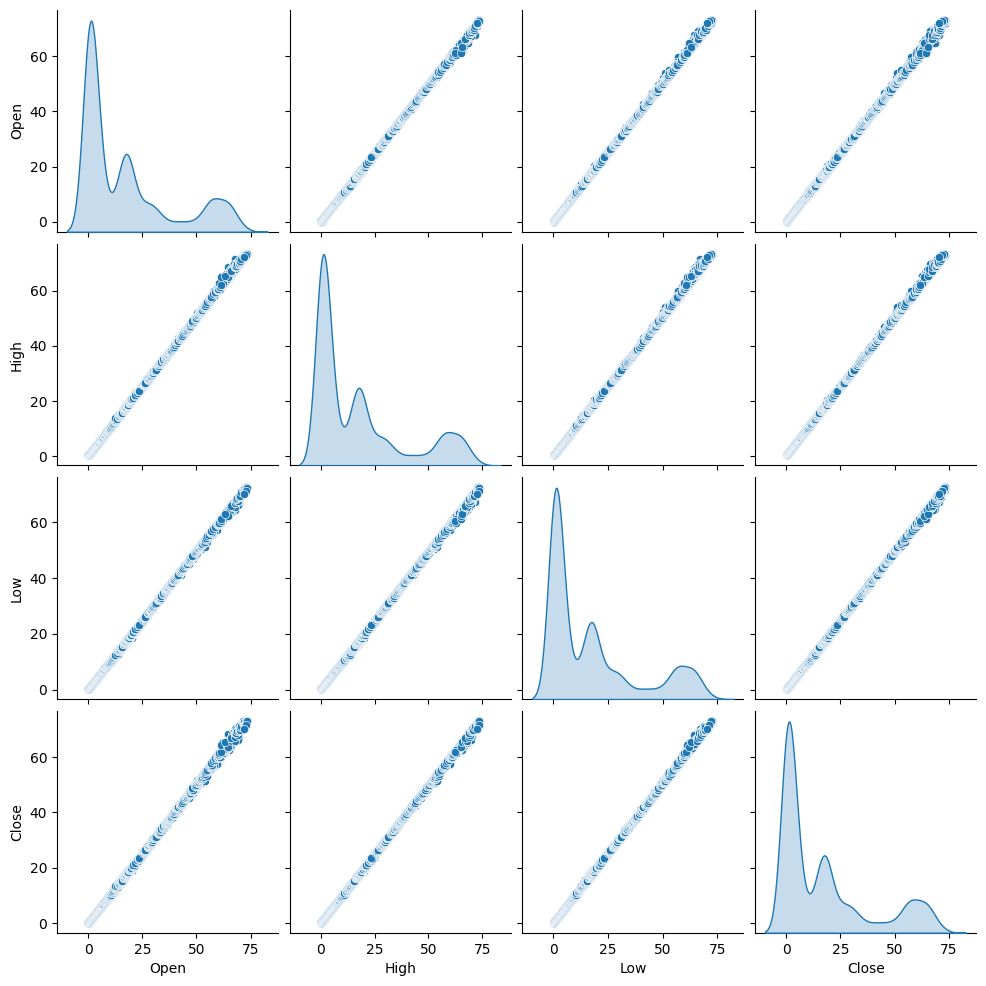

In [15]:
sns.pairplot(cl[numerical_col], diag_kind='kde')
plt.show()

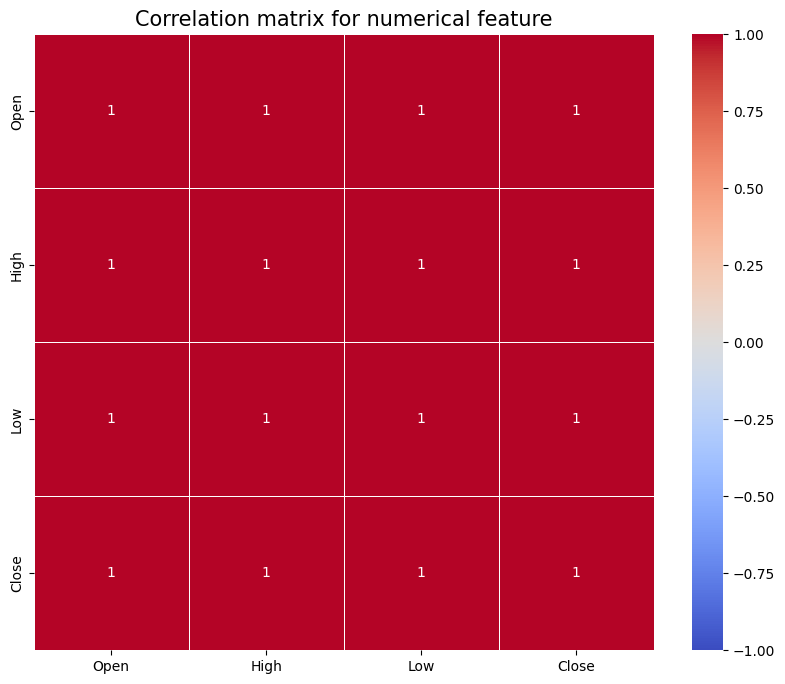

In [16]:
plt.figure(figsize=(10,8))
corr = cl[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

In [17]:
x = cl.iloc[:, 0:].values
y = cl.iloc[:,-1].values
print(x)

[[0.00000000e+00 4.70298201e-01 4.62337461e-01 4.70298201e-01
  6.72000000e+05]
 [0.00000000e+00 4.73359843e-01 4.59275361e-01 4.71522629e-01
  7.39200000e+05]
 [0.00000000e+00 4.77034280e-01 4.67848656e-01 4.70298201e-01
  1.33920000e+06]
 ...
 [7.31500015e+01 7.34100037e+01 7.21999969e+01 7.29100037e+01
  6.45090000e+06]
 [7.29199982e+01 7.31999969e+01 7.12399979e+01 7.17699966e+01
  4.61720000e+06]
 [7.20000000e+01 7.22900009e+01 7.01600037e+01 7.02500000e+01
  7.50690000e+06]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['Gradient Boosting', 'KNN', 'Random Forest'])

**Modeling**

In [21]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose = 1,
      n_jobs = -1,
  )

  return results

In [22]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error'],
}
gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(x_train, y_train)
print(gradient_boost_search.best_estimator_)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
0.9999989423731407


In [23]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(x_train, y_train)
print(knn_search.best_estimator_)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsRegressor(n_neighbors=4)
{'n_neighbors': 4}
0.9993258133782856


In [24]:
rf = RandomForestRegressor()
hyperparameters = {
    'n_estimators' : [10, 25, 50, 75, 100],
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
}

rdForestSearch = grid_search(rf, hyperparameters)
rdForestSearch.fit(x_train, y_train)
print(rdForestSearch.best_estimator_)
print(rdForestSearch.best_params_)
print(rdForestSearch.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
RandomForestRegressor(criterion='absolute_error', n_estimators=75)
{'criterion': 'absolute_error', 'n_estimators': 75}
0.9999994566571064


**Model Training**

In [25]:
gradient_boost = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)

In [26]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [28]:
rf = RandomForestRegressor(criterion='absolute_error', n_estimators=75)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=75)

In [29]:
model_dict = {
    'Gradient Boosting':gradient_boost,
    'KNN':knn,
    'Random Forest':rf,
}

for name,model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(x_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(x_test))

models

,train_mse,test_mse
Gradient Boosting,1626774.206643,2385916015.821763
KNN,902175794.013505,3794621316.670325
Random Forest,166434.387352,2386956827.095893


<AxesSubplot: >

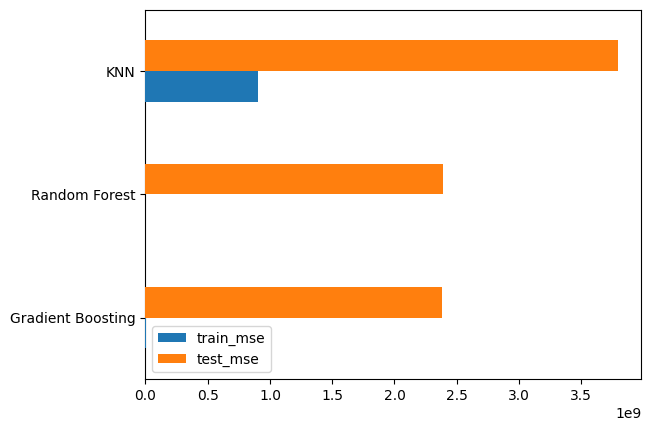

In [30]:
models.sort_values(by='test_mse', ascending=True).plot(kind="barh", zorder=3)

In [31]:
gradientBoostAcc = gradient_boost.score(x_test, y_test)*100
randomForestAcc = rf.score(x_test, y_test)*100
knnAcc = knn.score(x_test, y_test)*100

In [32]:
eval_list = [[gradientBoostAcc],[randomForestAcc],[knnAcc]]
eval = pd.DataFrame(eval_list,
                    columns=['Acc (%)'],
                    index=['Gradient Boosting','Random Forest','K-Nearest Neighbor'])
eval

,Acc (%)
Gradient Boosting,99.921065
Random Forest,99.921031
K-Nearest Neighbor,99.874460


**Prediksi**

In [33]:
prediksi = x_test[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_Gradient Boosting,prediksi_KNN,prediksi_Random Forest
0,1829600,1769802.8,1726050.0,1770709.3
